# Project: Ridge Regression
*Team BARDO : Cindy DO ,Barthélémy CHARLIER*


The goal of this project is to perform ridge regression, which involves using the L2 regularizer on linear regression, on the Olympics 100m dataset. We will implement a custom Ridge class, compare our results with scikit-learn's Ridge model, and then perform hyperparameter tuning to find the best possible model. Additionally, our code should be able to perform on any dataset.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from Ridge import RidgeReg
from sklearn.model_selection import LeaveOneOut


Let's load our dataset and plot it 

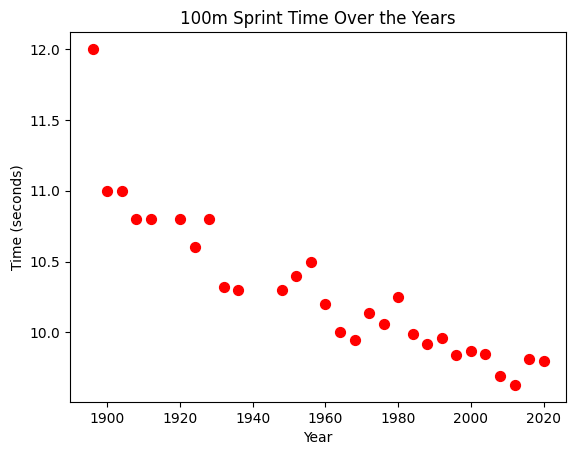

In [7]:

# Read the CSV file
df = pd.read_csv('olympics_100m.csv')

# Plot the points only
df.plot.scatter(x='Year', y='Time', color='r', marker='o', s=50)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('100m Sprint Time Over the Years')

# Show the plot
plt.show()


Let's split the dataset into a training and a testing set  

In [8]:
data = pd.read_csv('olympics_100m.csv')

X ,y = data.iloc[:, :-1], data.iloc[:, -1] # load the data 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print the training and testing data with corresponding times
print("Training Data:")
print(X_train.join(y_train))
print("\nTesting Data:")
print(X_test.join(y_test))


Training Data:
    Year   Time
0   1896  12.00
1   1900  11.00
2   1904  11.00
3   1908  10.80
4   1912  10.80
5   1920  10.80
6   1924  10.60
7   1928  10.80
8   1932  10.32
9   1936  10.30
10  1948  10.30
11  1952  10.40
12  1956  10.50
13  1960  10.20
14  1964  10.00
15  1968   9.95
16  1972  10.14
17  1976  10.06
18  1980  10.25
19  1984   9.99
20  1988   9.92
21  1992   9.96
22  1996   9.84

Testing Data:
    Year  Time
23  2000  9.87
24  2004  9.85
25  2008  9.69
26  2012  9.63
27  2016  9.81
28  2020  9.80


Now let's test once our model on the validation set, and compare the mean square error with scikit learn's model 

Mean Squared Error (scikit-learn): 0.07861356729361699
Mean Squared Error (custom model): 0.07861356729562581
Error Rate: 2.5553142188117653e-11
alpha = 1 gives ; value of w: [ 4.18105164e+01 -1.61412467e-02]


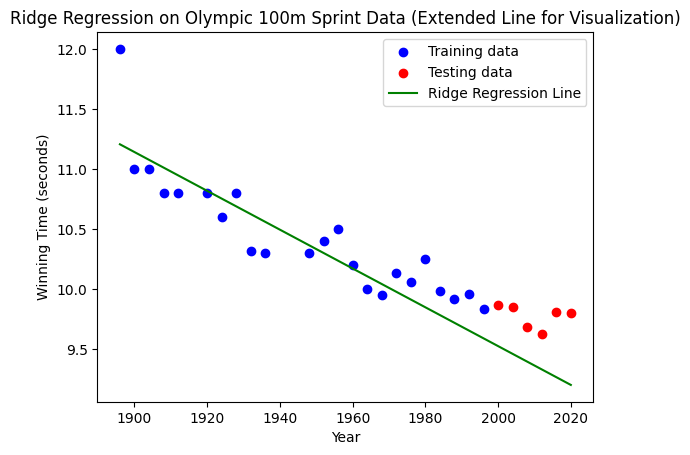

In [9]:

alpha =1 # Set the regularization parameter

X_train_val, X_val, y_train_val, y_val  = train_test_split(X_train, y_train, test_size=0.20,shuffle=False)

# Fit and predict using scikit-learn's Ridge model
model = Ridge(alpha=alpha)
model.fit(X_train_val, y_train_val)
y_pred_sklearn = model.predict(X_val)

# Fit and predict using custom RidgeReg model
custom_model = RidgeReg(alpha=alpha)
custom_model.fit(X_train_val, y_train_val)
y_pred_custom = custom_model.predict(X_val)

# Calculate mean squared error for both models
mse_sklearn = mean_squared_error(y_val, y_pred_sklearn)
mse_custom = mean_squared_error(y_val, y_pred_custom)

# Calculate error rate
error_rate = abs(mse_sklearn - mse_custom) / mse_sklearn

# Print the mean squared error
print("Mean Squared Error (scikit-learn):", mse_sklearn)
print("Mean Squared Error (custom model):", mse_custom)
print("Error Rate:", error_rate)

# Print the value of w
print("alpha =", alpha, "gives ; value of w:", custom_model.thetas)


# Plotting the results with the regression line over the entire range (chatGPT)
all_years = np.array(data['Year']).reshape(-1, 1)
all_predictions = custom_model.predict(all_years)

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(all_years, all_predictions, color='green', label='Ridge Regression Line')

plt.title('Ridge Regression on Olympic 100m Sprint Data (Extended Line for Visualization)')
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.legend()
plt.show()


# Hyperparameter tuning

Let's now do some hyper parameter tuning using the leave one out cross validation (number of folds = numbers of dimension of the training set ( K = D))

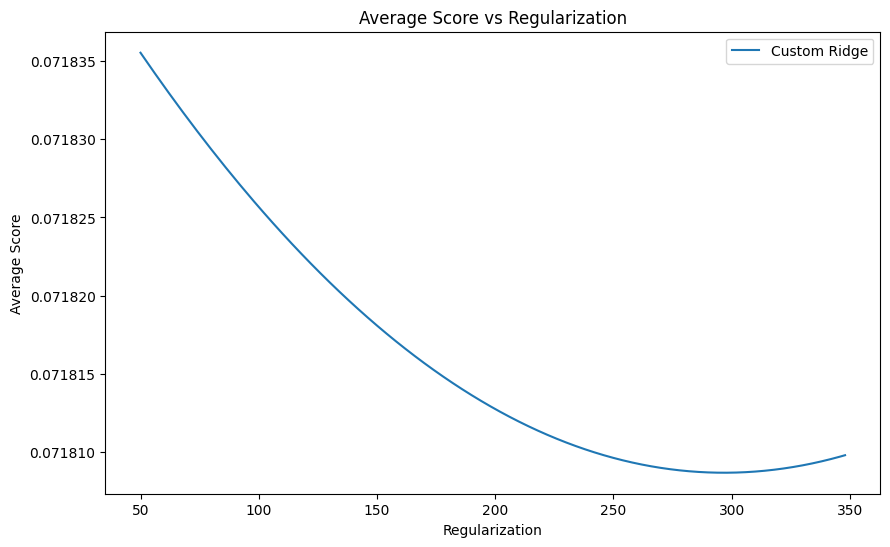

The optimal lambda value is 296.0


In [10]:
# use of chatGPT in this cell

loo = LeaveOneOut()
regularization = list(range(50, 350, 2))
lambda_scores = []

for alpha in regularization:
    # Iterate over each split, code made by chatGPT for kfold on a previous project
    scores = []

    for train_index, test_index in loo.split(X_train):
        # Split data
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Initialize the ridge model
        ridge = RidgeReg(alpha=alpha)

        # Train the model
        ridge.fit(X_train_fold, y_train_fold)

        # Evaluate the model
        y_pred = ridge.predict(X_test_fold)
        score = mean_squared_error(y_test_fold ,y_pred)
        scores.append(score)


    # Calculate average performance
    average_score = np.mean(scores)

    # Append to the list of average scores
    lambda_scores.append([alpha, average_score])

# Convert to NumPy array
    
lambda_scores = np.array(lambda_scores)
import matplotlib.pyplot as plt

regularization_values = lambda_scores[:, 0]
average_scores = lambda_scores[:, 1]

# Plot the figure
plt.figure(figsize=(10, 6))
plt.plot(regularization_values, average_scores, label='Custom Ridge')
plt.xlabel('Regularization')
plt.ylabel('Average Score')
plt.title('Average Score vs Regularization')
plt.legend()
plt.show()
min_score_index = np.argmin(average_scores)

optimal_lambda = regularization_values[min_score_index]

print(f"The optimal lambda value is {optimal_lambda}")



Let's now plot the final results ! 

Mean Squared Error (alpha = 296): 0.04696892504694113
Mean Squared Error (alpha = 0): 0.05148365684696741
alpha = 296, value of w: [ 3.68510052e+01 -1.35646736e-02]
alpha = 0, value of w: [ 3.72001603e+01 -1.37439433e-02]


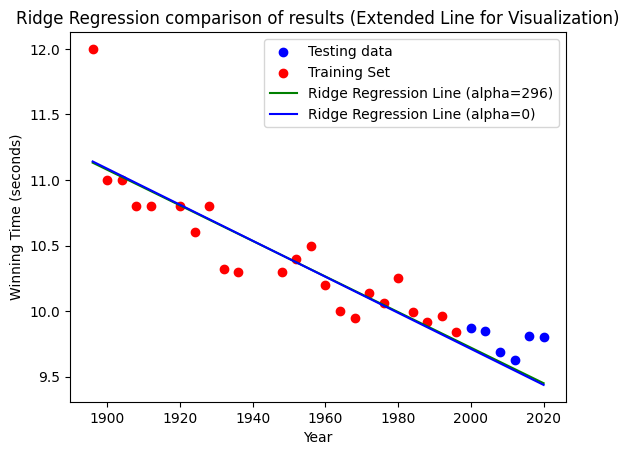

In [11]:


# Fit and predict using the model with optimal lambda and lambda = 0 (linear regression)
custom_model = RidgeReg(alpha=296)
custom_model.fit(X_train, y_train)

y_pred_alpha_296 = custom_model.predict(X_test)

custom_model_0 = RidgeReg(alpha=0)
custom_model_0.fit(X_train, y_train)

y_pred_alpha_0 = custom_model_0.predict(X_test)

# Calculate mean squared error for both models
mse_alpha_296 = mean_squared_error(y_test, y_pred_alpha_296)
mse_alpha_0 = mean_squared_error(y_test, y_pred_alpha_0)

# Print the mean squared error
print("Mean Squared Error (alpha = 296):", mse_alpha_296)
print("Mean Squared Error (alpha = 0):", mse_alpha_0)

# Print the value of w for alpha = 296
print("alpha = 296, value of w:", custom_model.thetas)

# Print the value of w for alpha = 0
print("alpha = 0, value of w:", custom_model_0.thetas)

# Plotting the results with the regression line over the entire range
all_years = np.array(data['Year']).reshape(-1, 1)
all_predictions = custom_model.predict(all_years)

# Plotting the results with the regression line over the entire range (ChatGPT)
all_years = np.array(data['Year']).reshape(-1, 1)
all_predictions_0 = custom_model_0.predict(all_years)
plt.scatter(X_test, y_test, color='b', label='Testing data')


plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Ridge Regression comparison of results (Extended Line for Visualization)')

# Plot the training set
plt.scatter(X_train, y_train, color='r', label='Training Set')

# Plot the predicted values from both models
plt.plot(all_years, all_predictions, color='green', label='Ridge Regression Line (alpha=296)')

plt.plot(all_years, all_predictions_0, color='b', label='Ridge Regression Line (alpha=0)')

plt.legend()
plt.show()
